## Applications of Data Science Assignment-2 Twitter Analysis
## Suhash Reddy Immareddy - 45693242

## Storing Tweets in JSON Format
Adapted from https://galaxydatatech.com/2018/05/07/scraping-twitter-data-with-tweepy/

In [1]:
import os
import tweepy
from tweepy import OAuthHandler
import json
import re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from nltk.corpus import stopwords
import seaborn as sns
import itertools
import collections
#import tweepy as tw
import nltk
import networkx
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import warnings
warnings.filterwarnings("ignore")
sns.set(font_scale=1.5)
sns.set_style("whitegrid")

In [2]:
# Do not run -----------------------------------------------------------
TWEETFILE = 'trump-150-tweets.json'

## FILL IN YOUR OWN DETAILS HERE ##
consumer_key = 'roxK4HJ7RxYZd2GvVIhKtDSxz'
consumer_secret = 'Ftnw2VSISbBa4kQcI25Y58GULb0IGFnE5Iiu1zdPjgT8ENGlC5'
access_token = '4060031714-0tpCZkCGM5Ow2JXl1FTFEagMjrP99F8qHF8HftU'
access_secret = 'jIzQWJmHXEk22hpSbSgZ496DQWt7J8cGxHejJgW9B6yx7'
##
 
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth)
print("Here Is the list of users whose tweet's you are going to analyse: \n")

user1 = api.get_user('BillGates')
print (user1.screen_name)
print (user1.name)
print("------------")
user2 = api.get_user('sundarpichai')
print (user2.screen_name)
print (user2.name)

Here Is the list of users whose tweet's you are going to analyse: 

BillGates
Bill Gates
------------
sundarpichai
Sundar Pichai


#### I am using the Tweet_Mode as "Extended" so that i will get the full text all the time and 200 tweets from each user for analysis

In [3]:
# Do Not run--------------------------------------------------------------------
tweets = api.user_timeline(screen_name = 'BillGates', tweet_mode='extended', count = 200)

with open("Bill_Gates.json", 'w') as outfile:
    for tweet in tweets:
        json.dump(tweet._json, outfile, sort_keys=True)
        outfile.write('\n')
        print(tweet.full_text)

The world’s poorest people often rely on farming both to feed their families and to earn an income. They will be among the first to face the effects of climate change. I’m excited about innovations aimed at addressing this problem: https://t.co/H7KrSXFo4b https://t.co/1QJg3gyJZY
Congrats to Esther Duflo, Abhijit Banerjee, and Michael Kremer for winning this year’s @NobelPrize in economics. I’ve learned a lot from their pioneering work to better understand the complexities of the lives of the world’s poorest people. https://t.co/Uc0XeytGRs
The world is facing a crisis at the dinner table, one that climate change will only worsen. I’m optimistic about the progress being made by @RIPEproject on a much-needed breakthrough. https://t.co/pzM61gDdWE
The odds of dying of AIDS in South Africa are less than half what they were at the peak. That progress wouldn’t have been possible without the @GlobalFund and other global health organizations. Even more progress is possible if we keep up the figh

#### When we try to read this json file we need to read as series of lines of Json entries

### In the same way we now try to Download the twitter Data for SundarPichai

In [6]:
# Do not run this one--------------------------------------------------------------------------
tweets = api.user_timeline(screen_name = 'sundarpichai', tweet_mode='extended', count = 200)

with open("Sundar_Pichai.json", 'w') as outfile:
    for tweet in tweets:
        json.dump(tweet._json, outfile, sort_keys=True)
        outfile.write('\n')
        print(tweet.full_text)

Very inspiring to see the historic #AllWomanSpacewalk - hopefully just the first of many to come. Congrats @Astro_Christina and @Astro_Jessica on your success today!
Very excited to introduce our latest family of #MadebyGoogle hardware: Pixel 4, Nest Mini, Nest Wifi, Pixelbook Go &amp; Pixel Buds - all designed to work together for a seamless, consistent experience, helping you whether you're at home or on the go. https://t.co/7hTYFAhDXl
Today we’re kicking off our 3rd #ImpactChallengeBayArea: we’ll donate $10M in grants to 35 nonprofits working to improve our communities. Excited to see the ideas that will come up and look forward to the progress we can make together in the Bay Area.
https://t.co/fgFnDwnVDz
Building on the privacy &amp; security features discussed at #io19, this week we're rolling out Incognito mode on Maps, Auto-delete in YouTube, simpler privacy controls, and even more protection for your passwords with a new Password Checkup feature.
https://t.co/RY8FN966jY
Thanks 

# Start Running From here

In [2]:
Bill_Gates = []
for line in open("Bill_Gates.json", 'r'):
    Bill_Gates.append(json.loads(line))
    
Sundar_Pichai = []
for line in open("Sundar_Pichai.json", 'r'):
    Sundar_Pichai.append(json.loads(line))

In [3]:
Sundar_Pichai

[{'contributors': None,
  'coordinates': None,
  'created_at': 'Fri Oct 18 18:58:48 +0000 2019',
  'display_text_range': [0, 165],
  'entities': {'hashtags': [{'indices': [35, 53],
     'text': 'AllWomanSpacewalk'}],
   'symbols': [],
   'urls': [],
   'user_mentions': [{'id': 3404297319,
     'id_str': '3404297319',
     'indices': [107, 123],
     'name': 'Christina H Koch',
     'screen_name': 'Astro_Christina'},
    {'id': 1524976560,
     'id_str': '1524976560',
     'indices': [128, 142],
     'name': 'Jessica Meir',
     'screen_name': 'Astro_Jessica'}]},
  'favorite_count': 2031,
  'favorited': False,
  'full_text': 'Very inspiring to see the historic #AllWomanSpacewalk - hopefully just the first of many to come. Congrats @Astro_Christina and @Astro_Jessica on your success today!',
  'geo': None,
  'id': 1185269011182804994,
  'id_str': '1185269011182804994',
  'in_reply_to_screen_name': None,
  'in_reply_to_status_id': None,
  'in_reply_to_status_id_str': None,
  'in_reply_to_

In [4]:
Bill_Gates

[{'contributors': None,
  'coordinates': None,
  'created_at': 'Sun Oct 20 23:10:00 +0000 2019',
  'display_text_range': [0, 255],
  'entities': {'hashtags': [],
   'media': [{'display_url': 'pic.twitter.com/1QJg3gyJZY',
     'expanded_url': 'https://twitter.com/BillGates/status/1186057003686219781/video/1',
     'id': 1185955517895589888,
     'id_str': '1185955517895589888',
     'indices': [256, 279],
     'media_url': 'http://pbs.twimg.com/media/EHVkw_rUwAE5GyW.jpg',
     'media_url_https': 'https://pbs.twimg.com/media/EHVkw_rUwAE5GyW.jpg',
     'sizes': {'large': {'h': 1080, 'resize': 'fit', 'w': 1920},
      'medium': {'h': 675, 'resize': 'fit', 'w': 1200},
      'small': {'h': 383, 'resize': 'fit', 'w': 680},
      'thumb': {'h': 150, 'resize': 'crop', 'w': 150}},
     'type': 'photo',
     'url': 'https://t.co/1QJg3gyJZY'}],
   'symbols': [],
   'urls': [{'display_url': 'b-gat.es/32wONvL',
     'expanded_url': 'https://b-gat.es/32wONvL',
     'indices': [232, 255],
     'url': 

In [5]:
# I am Checking whether there are 200 tweets or no
count = 1
for t in Bill_Gates:
    print (count)
    count += 1
    print(t['full_text'])
    print(t['created_at'])

1
The world’s poorest people often rely on farming both to feed their families and to earn an income. They will be among the first to face the effects of climate change. I’m excited about innovations aimed at addressing this problem: https://t.co/H7KrSXFo4b https://t.co/1QJg3gyJZY
Sun Oct 20 23:10:00 +0000 2019
2
Congrats to Esther Duflo, Abhijit Banerjee, and Michael Kremer for winning this year’s @NobelPrize in economics. I’ve learned a lot from their pioneering work to better understand the complexities of the lives of the world’s poorest people. https://t.co/Uc0XeytGRs
Sat Oct 19 17:05:00 +0000 2019
3
The world is facing a crisis at the dinner table, one that climate change will only worsen. I’m optimistic about the progress being made by @RIPEproject on a much-needed breakthrough. https://t.co/pzM61gDdWE
Fri Oct 18 20:00:00 +0000 2019
4
The odds of dying of AIDS in South Africa are less than half what they were at the peak. That progress wouldn’t have been possible without the @Gl

In [6]:
# I am Checking whether there are 200 tweets or no
count = 1
for t in Sundar_Pichai:
    print (count)
    count += 1
    print(t['full_text'])
    print(t['created_at'])

1
Very inspiring to see the historic #AllWomanSpacewalk - hopefully just the first of many to come. Congrats @Astro_Christina and @Astro_Jessica on your success today!
Fri Oct 18 18:58:48 +0000 2019
2
Very excited to introduce our latest family of #MadebyGoogle hardware: Pixel 4, Nest Mini, Nest Wifi, Pixelbook Go &amp; Pixel Buds - all designed to work together for a seamless, consistent experience, helping you whether you're at home or on the go. https://t.co/7hTYFAhDXl
Tue Oct 15 15:29:13 +0000 2019
3
Today we’re kicking off our 3rd #ImpactChallengeBayArea: we’ll donate $10M in grants to 35 nonprofits working to improve our communities. Excited to see the ideas that will come up and look forward to the progress we can make together in the Bay Area.
https://t.co/fgFnDwnVDz
Mon Oct 07 16:39:11 +0000 2019
4
Building on the privacy &amp; security features discussed at #io19, this week we're rolling out Incognito mode on Maps, Auto-delete in YouTube, simpler privacy controls, and even mo

In [7]:
# we now try to look at the Keys that contains Values cause all the tweets are stores in Dictionary
Bill_Gates[0].keys()

dict_keys(['contributors', 'coordinates', 'created_at', 'display_text_range', 'entities', 'extended_entities', 'favorite_count', 'favorited', 'full_text', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'place', 'possibly_sensitive', 'retweet_count', 'retweeted', 'source', 'truncated', 'user'])

In [8]:
create  =[]
create1 =[]
create2 =[]
for t in Bill_Gates:
    create.append(t['created_at'])
    create1.append(t['full_text'])
    create2.append(t['retweet_count'])

In [9]:
# We are storing only the entities field, which is later used to extract the information we need
c = []
for t in Bill_Gates:
    c.append(t['entities'])

In [10]:
c[0]

{'hashtags': [],
 'media': [{'display_url': 'pic.twitter.com/1QJg3gyJZY',
   'expanded_url': 'https://twitter.com/BillGates/status/1186057003686219781/video/1',
   'id': 1185955517895589888,
   'id_str': '1185955517895589888',
   'indices': [256, 279],
   'media_url': 'http://pbs.twimg.com/media/EHVkw_rUwAE5GyW.jpg',
   'media_url_https': 'https://pbs.twimg.com/media/EHVkw_rUwAE5GyW.jpg',
   'sizes': {'large': {'h': 1080, 'resize': 'fit', 'w': 1920},
    'medium': {'h': 675, 'resize': 'fit', 'w': 1200},
    'small': {'h': 383, 'resize': 'fit', 'w': 680},
    'thumb': {'h': 150, 'resize': 'crop', 'w': 150}},
   'type': 'photo',
   'url': 'https://t.co/1QJg3gyJZY'}],
 'symbols': [],
 'urls': [{'display_url': 'b-gat.es/32wONvL',
   'expanded_url': 'https://b-gat.es/32wONvL',
   'indices': [232, 255],
   'url': 'https://t.co/H7KrSXFo4b'}],
 'user_mentions': []}

In [11]:
c[9]

{'hashtags': [],
 'symbols': [],
 'urls': [{'display_url': 'b-gat.es/2pZr7lx',
   'expanded_url': 'https://b-gat.es/2pZr7lx',
   'indices': [227, 250],
   'url': 'https://t.co/a9m56tDdLp'}],
 'user_mentions': [{'id': 3169963433,
   'id_str': '3169963433',
   'indices': [211, 226],
   'name': 'Our World in Data',
   'screen_name': 'OurWorldInData'}]}

#### We are interested in Media where we look for video/ photo Postings, Url's for link in the text. If any one of them is present we increase the count

In [12]:
# Creating Empty Dataframes and Later we try to add the columns that we are interested in 
Billy = pd.DataFrame({'post_time': create,'text':create1,'retweet':create2})

In [13]:
s = [] # it's a list with values 0 and 1. 0 means no picture or link, 1 means picture or link

In [14]:
s1 = [] # it's a list with values 2 and 1. 2 for the tweets with picture and link, 1 for tweets with only picture or link

### If the user Posts any Picture or Link In the tweet i am getting the count as 1 if not 0
### We can see from the above c[0] and c[9] that Bill Gates Posts almost all the tweets with Either a link or photo

In [15]:
for i in range(0,200):
    x1 = []
    x = c[i]
    for j in x.keys():
        if(j == 'media' or j == 'urls'):
            x1.append(1)
        else:
            x1.append(0)
    if sum(x1)==2:
        s.append(1)
    else:
        s.append(1)

In [16]:
for i in range(0,200):
    x1 = []
    x = c[i]
    for j in x.keys():
        if(j == 'media' or j == 'urls'):
            x1.append(1)
        else:
            x1.append(0)
    s1.append(sum(x1))

In [17]:
print(s) # it's a list with values 0 and 1. 0 means no picture or link, 1 means picture or link

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [18]:
print(s1)# it's a list with values 2 and 1. 2 for the tweets with picture and link, 1 for tweets with only picture or link

[2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2]


In [19]:
s2 = [] #it's a list with values 0 and 1, 0 means no picture and 1 means picture

In [20]:
for i in range(0,200):
    x1 = []
    x = c[i]
    for j in x.keys():
        if j == 'media':
            x1.append(1)
        else:
            x1.append(0)
    s2.append(sum(x1))

In [21]:
print(s2)

[1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1]


In [22]:
s3 = [] #it's a list with values 0 and 1, 0 means no link and 1 means link
for i in range(0,200):
    x1 = []
    x = c[i]
    for j in x.keys():
        if j == 'urls':
            x1.append(1)
        else:
            x1.append(0)
    s3.append(sum(x1))

In [23]:
print(s3)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


#### From this we can conclude that Bill Gates Posts a tweet with atleast a link in the tweet

### Now we do the same for the SundarPichai

In [24]:
create3 =[]
create4 =[]
create5 =[]
for t in Sundar_Pichai:
    create3.append(t['created_at'])
    create4.append(t['full_text'])
    create5.append(t['retweet_count'])

In [25]:
Sunny = pd.DataFrame({'post_time': create3, 'text':create4, 'retweet':create5})

In [26]:
s4 = [] # it's a list with values 0 and 1. 0 means no picture or link, 1 means picture or link
s5 = [] # it's a list with values 2 and 1. 2 for the tweets with picture and link, 1 for tweets with only picture or link
s6 = [] #it's a list with values 0 and 1, 0 means no picture and 1 means picture
s7 = [] #it's a list with values 0 and 1, 0 means no link and 1 means link

In [27]:
c = []
for t in Sundar_Pichai:
    c.append(t['entities'])

In [28]:
for i in range(0,200):
    x1 = []
    x = c[i]
    for j in x.keys():
        if(j == 'media' or j == 'urls'):
            x1.append(1)
        else:
            x1.append(0)
    if sum(x1)==2:
        s4.append(1)
    else:
        s4.append(1)

In [29]:
for i in range(0,200):
    x1 = []
    x = c[i]
    for j in x.keys():
        if(j == 'media' or j == 'urls'):
            x1.append(1)
        else:
            x1.append(0)
    s5.append(sum(x1))

In [30]:
print(s4) # it's a list with values 0 and 1. 0 means no picture or link, 1 means picture or link

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [31]:
print(s5)# it's a list with values 2 and 1. 2 for the tweets with picture and link, 1 for tweets with only picture or link

[1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [32]:
for i in range(0,200):
    x1 = []
    x = c[i]
    for j in x.keys():
        if j == 'media':
            x1.append(1)
        else:
            x1.append(0)
    s6.append(sum(x1))

In [33]:
for i in range(0,200):
    x1 = []
    x = c[i]
    for j in x.keys():
        if j == 'urls':
            x1.append(1)
        else:
            x1.append(0)
    s7.append(sum(x1))

In [34]:
print(s6)

[0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [35]:
print(s7)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


### We can see that Sundar Pichai and Bill Gates posts atleast a link in tweet

In [36]:
Billy["Photo/Link_Normalized"] = s
Billy["Photo/Link"] = s1
Billy["Photo"] = s2
Billy["Link"] = s3

In [37]:
N1 = []
for i in s:
    N1.append(i-1)
print(N1)
Billy["No_Photo/Link_Normalized"] = N1

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [38]:
Billy.head()

,post_time,text,retweet,Photo/Link_Normalized,Photo/Link,Photo,Link,No_Photo/Link_Normalized
0,Sun Oct 20 23:10:00 +0000 2019,The world’s poorest people often rely on farmi...,796,1,2,1,1,0
1,Sat Oct 19 17:05:00 +0000 2019,"Congrats to Esther Duflo, Abhijit Banerjee, an...",913,1,1,0,1,0
2,Fri Oct 18 20:00:00 +0000 2019,The world is facing a crisis at the dinner tab...,714,1,1,0,1,0
3,Tue Oct 15 19:58:30 +0000 2019,The odds of dying of AIDS in South Africa are ...,585,1,2,1,1,0
4,Sat Oct 12 19:14:19 +0000 2019,We need more approaches to stopping #Alzheimer...,1172,1,1,0,1,0


In [39]:
Sunny["Photo/Link_Normalized"] = s4
Sunny["Photo/Link"] = s5
Sunny["Photo"] = s6
Sunny["Link"] = s7

In [40]:
N2 = []
for i in s4:
    N2.append(i-1)
print(N2)
Sunny["No_Photo/Link_Normalized"] = N2

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [41]:
Sunny.head()

,post_time,text,retweet,Photo/Link_Normalized,Photo/Link,Photo,Link,No_Photo/Link_Normalized
0,Fri Oct 18 18:58:48 +0000 2019,Very inspiring to see the historic #AllWomanSp...,182,1,1,0,1,0
1,Tue Oct 15 15:29:13 +0000 2019,Very excited to introduce our latest family of...,773,1,1,0,1,0
2,Mon Oct 07 16:39:11 +0000 2019,Today we’re kicking off our 3rd #ImpactChallen...,151,1,1,0,1,0
3,Wed Oct 02 18:46:47 +0000 2019,Building on the privacy &amp; security feature...,258,1,1,0,1,0
4,Sat Sep 28 03:41:45 +0000 2019,Thanks for all the Google 21st birthday wishes...,1240,1,2,1,1,0


In [42]:
ss = [] # Extracting the Hour from the post_time which canbe used to plot no of tweets posted during that hour 
for i in Sunny.post_time:
    ss.append(int(i[11:13]))

In [43]:
Sunny["hours"] = ss
Sunny.head()

,post_time,text,retweet,Photo/Link_Normalized,Photo/Link,Photo,Link,No_Photo/Link_Normalized,hours
0,Fri Oct 18 18:58:48 +0000 2019,Very inspiring to see the historic #AllWomanSp...,182,1,1,0,1,0,18
1,Tue Oct 15 15:29:13 +0000 2019,Very excited to introduce our latest family of...,773,1,1,0,1,0,15
2,Mon Oct 07 16:39:11 +0000 2019,Today we’re kicking off our 3rd #ImpactChallen...,151,1,1,0,1,0,16
3,Wed Oct 02 18:46:47 +0000 2019,Building on the privacy &amp; security feature...,258,1,1,0,1,0,18
4,Sat Sep 28 03:41:45 +0000 2019,Thanks for all the Google 21st birthday wishes...,1240,1,2,1,1,0,3


In [44]:
ss = [] # Extracting the Hour from the post_time which canbe used to plot no of tweets posted during that hour 
for i in Billy.post_time:
    ss.append(int(i[11:13]))

In [45]:
Billy["hours"] = ss
Billy.head()

,post_time,text,retweet,Photo/Link_Normalized,Photo/Link,Photo,Link,No_Photo/Link_Normalized,hours
0,Sun Oct 20 23:10:00 +0000 2019,The world’s poorest people often rely on farmi...,796,1,2,1,1,0,23
1,Sat Oct 19 17:05:00 +0000 2019,"Congrats to Esther Duflo, Abhijit Banerjee, an...",913,1,1,0,1,0,17
2,Fri Oct 18 20:00:00 +0000 2019,The world is facing a crisis at the dinner tab...,714,1,1,0,1,0,20
3,Tue Oct 15 19:58:30 +0000 2019,The odds of dying of AIDS in South Africa are ...,585,1,2,1,1,0,19
4,Sat Oct 12 19:14:19 +0000 2019,We need more approaches to stopping #Alzheimer...,1172,1,1,0,1,0,19


In [46]:
suhas = "@suhash #suhash hello, everyone @stella!"
import re
d = suhas.split()
c = 0
for d1 in d:
    if re.match(r"^#", d1):
        c+=1
print(c)
print(d)

1
['@suhash', '#suhash', 'hello,', 'everyone', '@stella!']


In [47]:
emp = []
for i in range(len(Billy['text'])):
    data = Billy.text[i].split() #split string into a list
    count = 0
    for temp in data:
        if re.match(r"^#", temp):
            count += 1
    emp.append(count)

In [48]:
Billy["Hastag_Count"] = emp
Billy.head()

,post_time,text,retweet,Photo/Link_Normalized,Photo/Link,Photo,Link,No_Photo/Link_Normalized,hours,Hastag_Count
0,Sun Oct 20 23:10:00 +0000 2019,The world’s poorest people often rely on farmi...,796,1,2,1,1,0,23,0
1,Sat Oct 19 17:05:00 +0000 2019,"Congrats to Esther Duflo, Abhijit Banerjee, an...",913,1,1,0,1,0,17,0
2,Fri Oct 18 20:00:00 +0000 2019,The world is facing a crisis at the dinner tab...,714,1,1,0,1,0,20,0
3,Tue Oct 15 19:58:30 +0000 2019,The odds of dying of AIDS in South Africa are ...,585,1,2,1,1,0,19,0
4,Sat Oct 12 19:14:19 +0000 2019,We need more approaches to stopping #Alzheimer...,1172,1,1,0,1,0,19,1


In [49]:
emp = []
for i in range(len(Sunny['text'])):
    data = Sunny.text[i].split() #split string into a list
    count = 0
    for temp in data:
        if re.match(r"^#", temp):
            count += 1
    emp.append(count)

In [50]:
Sunny["Hastag_Count"] = emp
Sunny.head()

,post_time,text,retweet,Photo/Link_Normalized,Photo/Link,Photo,Link,No_Photo/Link_Normalized,hours,Hastag_Count
0,Fri Oct 18 18:58:48 +0000 2019,Very inspiring to see the historic #AllWomanSp...,182,1,1,0,1,0,18,1
1,Tue Oct 15 15:29:13 +0000 2019,Very excited to introduce our latest family of...,773,1,1,0,1,0,15,1
2,Mon Oct 07 16:39:11 +0000 2019,Today we’re kicking off our 3rd #ImpactChallen...,151,1,1,0,1,0,16,1
3,Wed Oct 02 18:46:47 +0000 2019,Building on the privacy &amp; security feature...,258,1,1,0,1,0,18,1
4,Sat Sep 28 03:41:45 +0000 2019,Thanks for all the Google 21st birthday wishes...,1240,1,2,1,1,0,3,0


In [51]:
St = list(set(Sunny['hours']))

In [52]:
St

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

In [53]:
cc = []
for i in St:
    c = 0
    for j in Sunny.hours:
        if i == j:
            c += 1
    cc.append(c)

In [54]:
cc

[5, 6, 5, 7, 10, 13, 6, 3, 5, 4, 2, 3, 3, 3, 11, 26, 17, 15, 8, 13, 16, 11, 8]

In [55]:
Time1 = pd.DataFrame({'post_time': St, 'freq':cc})
print(Time1.head())

   post_time  freq
0          0     5
1          1     6
2          2     5
3          3     7
4          4    10


In [56]:
Bt = list(set(Billy['hours']))

In [57]:
Bt

[0, 1, 2, 3, 4, 5, 8, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]

In [58]:
cc = []
for i in Bt:
    c = 0
    for j in Billy.hours:
        if i == j:
            c += 1
    cc.append(c)

In [59]:
cc

[5, 2, 1, 3, 3, 1, 1, 7, 16, 8, 25, 9, 29, 28, 15, 11, 12, 13, 5, 6]

In [60]:
Time2 = pd.DataFrame({'post_time': Bt, 'freq':cc})
print(Time2.head())

   post_time  freq
0          0     5
1          1     2
2          2     1
3          3     3
4          4     3


### 1) Use pandas to plot the posting times of the tweets for the two users, as in the Trump analysis comparing Android and iPhone posting times.

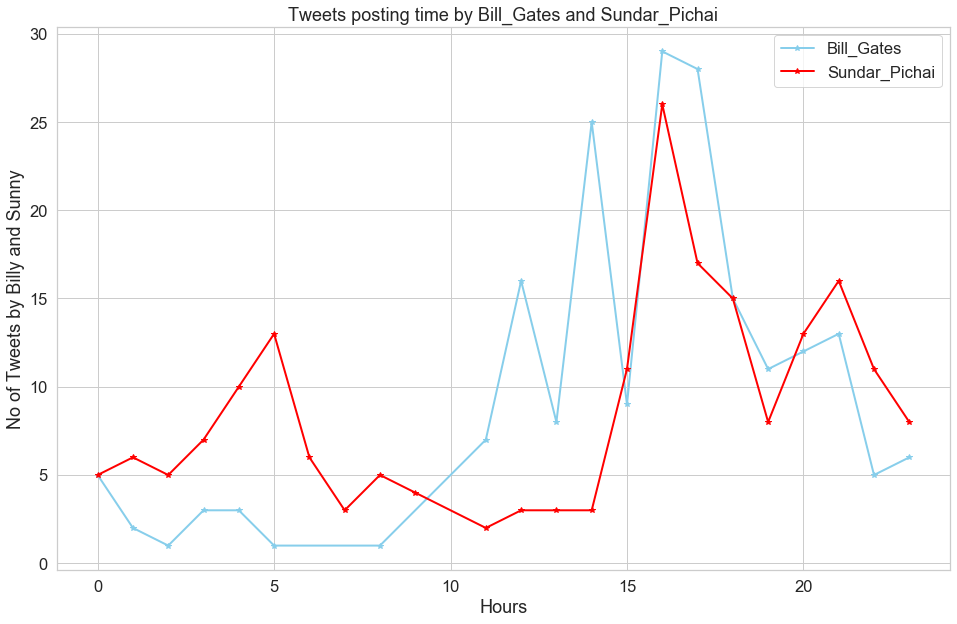

In [61]:
plt.figure(figsize=(16, 10))
plt.title("Tweets posting time by Bill_Gates and Sundar_Pichai")
plt.ylabel("No of Tweets by Billy and Sunny")
plt.xlabel("Hours")
plt.plot( 'post_time', 'freq', data=Time2, color='skyblue', linewidth=2, label = 'Bill_Gates', marker = '*')
plt.plot( 'post_time', 'freq', data=Time1, color='red', linewidth=2, label = 'Sundar_Pichai', marker = '*')
plt.legend()

### 2) Use pandas to construct a bar chart of the proportions of tweets for each of the two users that contain pictures or links, as in the Trump analysis.

### Since Both Sundar_Pichai and Bill_Gates tends uses atleast a link In their tweets ill be plotting three graphs
#### i) Bar chart with Link/Photos
#### ii) Bar chart with Link alone
#### iii) Bar chart with Phtos alone

In [62]:
Billy.columns

Index(['post_time', 'text', 'retweet', 'Photo/Link_Normalized', 'Photo/Link',
       'Photo', 'Link', 'No_Photo/Link_Normalized', 'hours', 'Hastag_Count'],
      dtype='object')

In [63]:
Billy.head()

,post_time,text,retweet,Photo/Link_Normalized,Photo/Link,Photo,Link,No_Photo/Link_Normalized,hours,Hastag_Count
0,Sun Oct 20 23:10:00 +0000 2019,The world’s poorest people often rely on farmi...,796,1,2,1,1,0,23,0
1,Sat Oct 19 17:05:00 +0000 2019,"Congrats to Esther Duflo, Abhijit Banerjee, an...",913,1,1,0,1,0,17,0
2,Fri Oct 18 20:00:00 +0000 2019,The world is facing a crisis at the dinner tab...,714,1,1,0,1,0,20,0
3,Tue Oct 15 19:58:30 +0000 2019,The odds of dying of AIDS in South Africa are ...,585,1,2,1,1,0,19,0
4,Sat Oct 12 19:14:19 +0000 2019,We need more approaches to stopping #Alzheimer...,1172,1,1,0,1,0,19,1


In [64]:
c = ["Bill_Gates","Sundar_Pichai"]
d = [sum(Billy["Photo/Link_Normalized"]),sum(Sunny["Photo/Link_Normalized"])]
d1 = [sum(Billy["No_Photo/Link_Normalized"]),sum(Sunny["No_Photo/Link_Normalized"])]
ypos = np.arange(len(c))

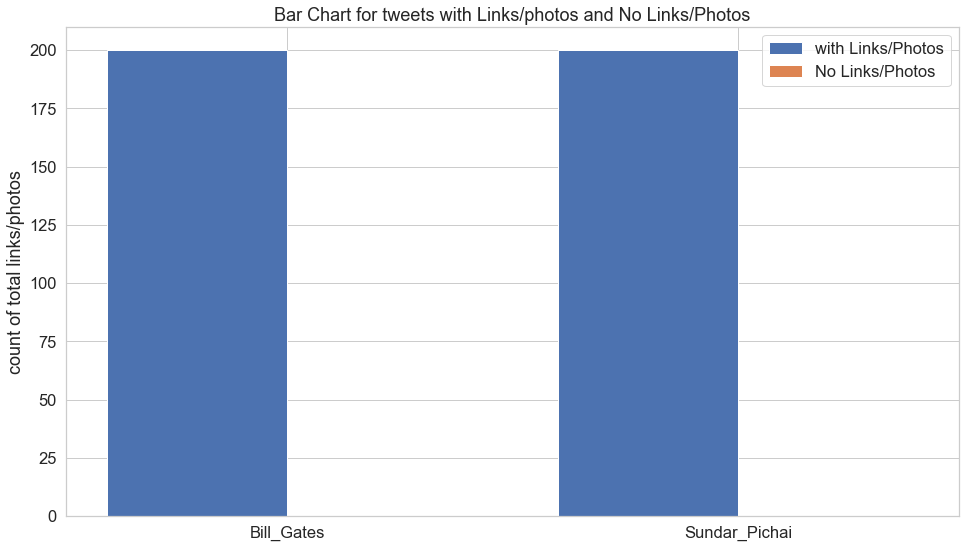

In [65]:
plt.figure(figsize=(16, 9))
plt.xticks(ypos,c)
plt.title("Bar Chart for tweets with Links/photos and No Links/Photos")
plt.ylabel("count of total links/photos")
plt.bar(ypos-0.2, d, width=0.4, label = "with Links/Photos")
plt.bar(ypos+0.2, d1, width=0.4, label = "No Links/Photos")
plt.legend()

In [66]:
c = ["Bill_Gates","Sundar_Pichai"]
d = [sum(Billy["Photo"]),sum(Sunny["Photo"])]
d1 = [len(Billy.Photo)-sum(Billy["Photo"]),len(Sunny.Photo)-sum(Sunny["Photo"])]
ypos = np.arange(len(c))

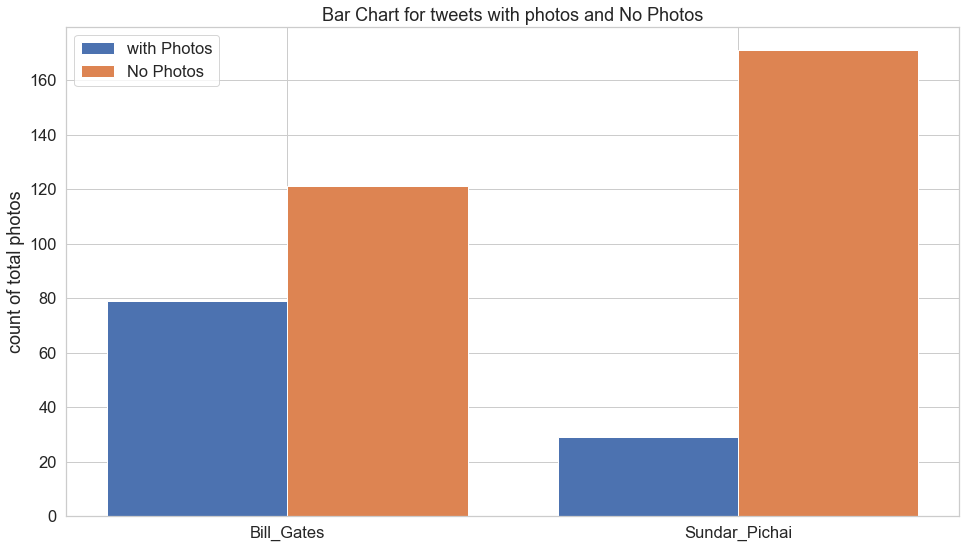

In [67]:
plt.figure(figsize=(16, 9))
plt.xticks(ypos,c)
plt.title("Bar Chart for tweets with photos and No Photos")
plt.ylabel("count of total photos")
plt.bar(ypos-0.2, d, width=0.4, label = "with Photos")
plt.bar(ypos+0.2, d1, width=0.4, label = "No Photos")
plt.legend()

In [68]:
c = ["Bill_Gates","Sundar_Pichai"]
d = [sum(Billy["Link"]),sum(Sunny["Link"])]
d1 = [len(Billy.Link)-sum(Billy["Link"]),len(Sunny.Link)-sum(Sunny["Link"])]
ypos = np.arange(len(c))

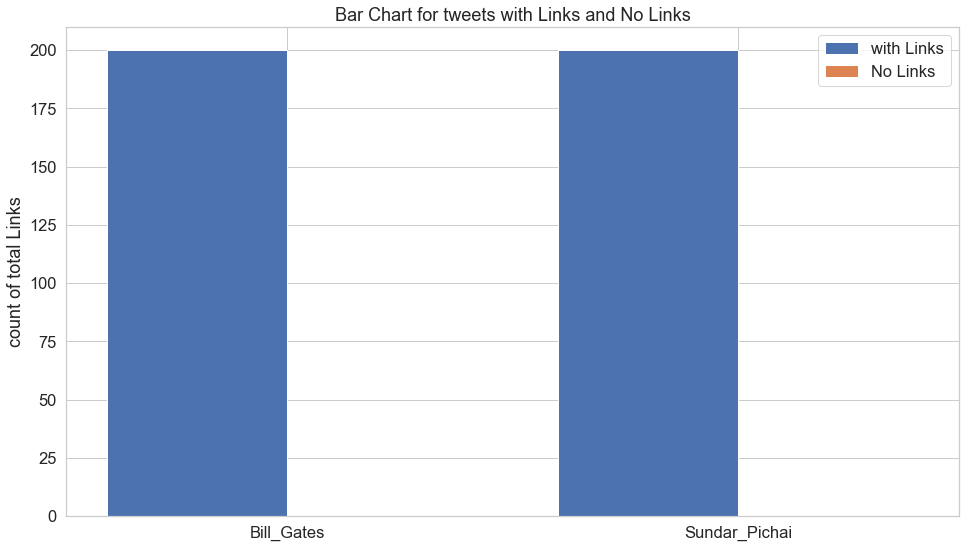

In [69]:
plt.figure(figsize=(16, 9))
plt.xticks(ypos,c)
plt.title("Bar Chart for tweets with Links and No Links")
plt.ylabel("count of total Links")
plt.bar(ypos-0.2, d, width=0.4, label = "with Links")
plt.bar(ypos+0.2, d1, width=0.4, label = "No Links")
plt.legend()

In [70]:
## thats the total analysis for the Second Question

In [71]:
print("Billy Hastag Count",set(Billy["Hastag_Count"]))
print("Sunny Hastag Count",set(Sunny["Hastag_Count"]))

Billy Hastag Count {0, 1, 2, 3}
Sunny Hastag Count {0, 1, 2, 3}


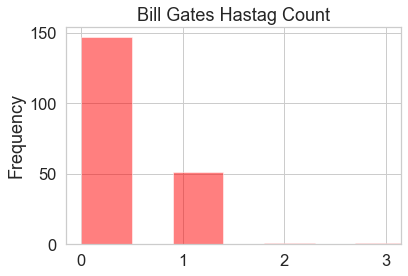

In [72]:
#First we plot them Individually 
plt.title("Bill Gates Hastag Count")
Billy.Hastag_Count.plot.hist(alpha=0.5, width = 0.5,facecolor='red')

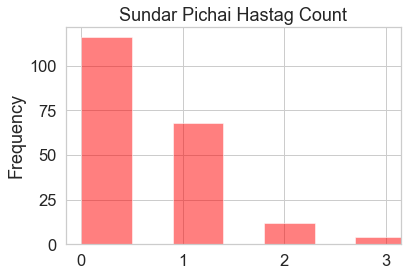

In [73]:
#First we plot them Individually 
plt.title("Sundar Pichai Hastag Count")
Sunny.Hastag_Count.plot.hist(alpha=0.5, width = 0.5,facecolor='red')

In [74]:
# Now we plot the data Togetgher

### 3) Use pandas to construct a histogram of the number of hashtags in tweets for each of the two users

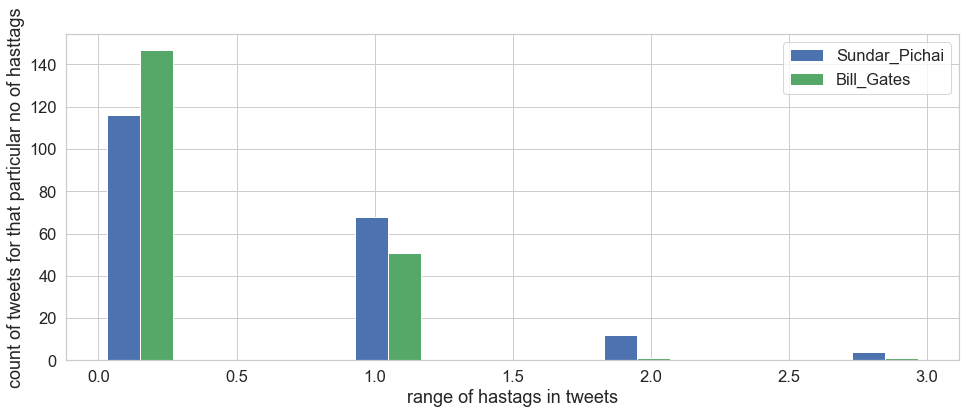

In [75]:
plt.style.use('seaborn-deep')
plt.figure(figsize=(16, 6))
plt.xlabel('range of hastags in tweets')
plt.ylabel('count of tweets for that particular no of hasttags')
plt.hist([Sunny.Hastag_Count, Billy.Hastag_Count], label=['Sundar_Pichai', 'Bill_Gates'])
plt.legend(loc='upper right')
plt.show()

### 4)Calculate the log odds ratio (defined in the Trump analysis) for each word used in the set of tweets, and list the 20 words most strongly associated with each of the two users

### For removing Stop words and Common words
Adapted From: https://www.analyticsvidhya.com/blog/2018/02/the-different-methods-deal-text-data-predictive-python/
https://www.earthdatascience.org/courses/earth-analytics-python/using-apis-natural-language-processing-twitter/calculate-tweet-word-frequencies-in-python/

#### 1) First we try to remove links from the text

In [76]:
Billy['text1'] = Billy['text'].apply(lambda x: " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", x) for x in x.split()))
Billy['text1'].head()

0    The worlds poorest people often rely on farmin...
1    Congrats to Esther Duflo Abhijit Banerjee and ...
2    The world is facing a crisis at the dinner tab...
3    The odds of dying of AIDS in South Africa are ...
4    We need more approaches to stopping Alzheimers...
Name: text1, dtype: object

In [77]:
Sunny['text1'] = Sunny['text'].apply(lambda x: " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", x) for x in x.split()))
Sunny['text1'].head()

0    Very inspiring to see the historic AllWomanSpa...
1    Very excited to introduce our latest family of...
2    Today were kicking off our 3rd ImpactChallenge...
3    Building on the privacy amp security features ...
4    Thanks for all the Google 21st birthday wishes...
Name: text1, dtype: object

In [78]:
Billy["text1"][0]

'The worlds poorest people often rely on farming both to feed their families and to earn an income They will be among the first to face the effects of climate change Im excited about innovations aimed at addressing this problem  '

In [79]:
Billy["text"][0]

'The world’s poorest people often rely on farming both to feed their families and to earn an income. They will be among the first to face the effects of climate change. I’m excited about innovations aimed at addressing this problem: https://t.co/H7KrSXFo4b https://t.co/1QJg3gyJZY'

#### 2) Before performing sentiment analysis on the text, We need to convert all the upper case words to lower case because the words Mountain and mountain are the same, other wise the model is gonna think like both are different words.

In [80]:
Billy['text1'] = Billy['text1'].apply(lambda x: " ".join(x.lower() for x in x.split()))
Billy['text1'].head()

0    the worlds poorest people often rely on farmin...
1    congrats to esther duflo abhijit banerjee and ...
2    the world is facing a crisis at the dinner tab...
3    the odds of dying of aids in south africa are ...
4    we need more approaches to stopping alzheimers...
Name: text1, dtype: object

In [81]:
Sunny['text1'] = Sunny['text1'].apply(lambda x: " ".join(x.lower() for x in x.split()))
Sunny['text1'].head()

0    very inspiring to see the historic allwomanspa...
1    very excited to introduce our latest family of...
2    today were kicking off our 3rd impactchallenge...
3    building on the privacy amp security features ...
4    thanks for all the google 21st birthday wishes...
Name: text1, dtype: object

#### 3) Now we remove the Punctuations from the data as it does not proviede any information for analysis

In [82]:
Billy['text1'] = Billy['text1'].str.replace('[^\w\s]','')
Billy['text1'].head()

0    the worlds poorest people often rely on farmin...
1    congrats to esther duflo abhijit banerjee and ...
2    the world is facing a crisis at the dinner tab...
3    the odds of dying of aids in south africa are ...
4    we need more approaches to stopping alzheimers...
Name: text1, dtype: object

In [83]:
Sunny['text1'] = Sunny['text1'].str.replace('[^\w\s]','')
Sunny['text1'].head()

0    very inspiring to see the historic allwomanspa...
1    very excited to introduce our latest family of...
2    today were kicking off our 3rd impactchallenge...
3    building on the privacy amp security features ...
4    thanks for all the google 21st birthday wishes...
Name: text1, dtype: object

#### 4) Now we remove the stop Words From Both using predefined libraries

In [84]:
stop_words = stopwords.words('english')
Billy['text1'] = Billy['text1'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))
Billy['text1'].head()

0    worlds poorest people often rely farming feed ...
1    congrats esther duflo abhijit banerjee michael...
2    world facing crisis dinner table one climate c...
3    odds dying aids south africa less half peak pr...
4    need approaches stopping alzheimers disease im...
Name: text1, dtype: object

In [85]:
Sunny['text1'] = Sunny['text1'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))
Sunny['text1'].head()

0    inspiring see historic allwomanspacewalk hopef...
1    excited introduce latest family madebygoogle h...
2    today kicking 3rd impactchallengebayarea well ...
3    building privacy amp security features discuss...
4    thanks google 21st birthday wishes importantly...
Name: text1, dtype: object

In [86]:
freq = pd.Series(' '.join(Billy['text1']).split()).value_counts()[:2]

In [87]:
freq

im     40
one    33
dtype: int64

In [88]:
freq = list(freq.index)
print(freq)
Billy['text1'] = Billy['text1'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
Billy['text1'].head()

['im', 'one']


0    worlds poorest people often rely farming feed ...
1    congrats esther duflo abhijit banerjee michael...
2    world facing crisis dinner table climate chang...
3    odds dying aids south africa less half peak pr...
4    need approaches stopping alzheimers disease ex...
Name: text1, dtype: object

In [89]:
freq1 = pd.Series(' '.join(Sunny['text1']).split()).value_counts()[:10]
freq1

google      48
rt          47
today       39
amp         39
new         30
great       28
help        26
work        25
see         24
googleai    21
dtype: int64

#### We remove the words new, see

In [90]:
freq2 = ['new','see','rt']
Sunny['text1'] = Sunny['text1'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
Sunny['text1'].head()

0    inspiring see historic allwomanspacewalk hopef...
1    excited introduce latest family madebygoogle h...
2    today kicking 3rd impactchallengebayarea well ...
3    building privacy amp security features discuss...
4    thanks google 21st birthday wishes importantly...
Name: text1, dtype: object

In [91]:
Bill_Total_Words = [tweet.lower().split() for tweet in Billy['text1']]
List_Words_across_tweets = list(itertools.chain(*Bill_Total_Words))
Bill_Words_Counts = collections.Counter(List_Words_across_tweets)
Bill_Words_Counts.most_common()

[('change', 31),
 ('world', 31),
 ('climate', 29),
 ('people', 24),
 ('new', 22),
 ('years', 20),
 ('progress', 20),
 ('fight', 20),
 ('work', 19),
 ('malaria', 19),
 ('help', 18),
 ('excited', 17),
 ('book', 16),
 ('alzheimers', 15),
 ('health', 14),
 ('year', 14),
 ('day', 13),
 ('read', 13),
 ('leadership', 13),
 ('like', 13),
 ('lives', 12),
 ('disease', 12),
 ('would', 12),
 ('together', 12),
 ('ive', 11),
 ('see', 11),
 ('think', 11),
 ('melinda', 11),
 ('possible', 10),
 ('inspired', 10),
 ('thats', 10),
 ('life', 10),
 ('every', 10),
 ('important', 10),
 ('electricity', 10),
 ('worlds', 9),
 ('better', 9),
 ('globalfund', 9),
 ('ever', 9),
 ('cant', 9),
 ('us', 9),
 ('countries', 9),
 ('make', 9),
 ('today', 9),
 ('could', 9),
 ('get', 9),
 ('energy', 9),
 ('learned', 8),
 ('lot', 8),
 ('made', 8),
 ('need', 8),
 ('last', 8),
 ('remarkable', 8),
 ('want', 8),
 ('commitment', 8),
 ('support', 8),
 ('partners', 8),
 ('much', 8),
 ('time', 8),
 ('fighting', 8),
 ('stories', 8),
 (

In [92]:
Bill_W_C = pd.DataFrame(Bill_Words_Counts.most_common(), columns=['words', 'count'])
Bill_W_C.head()

,words,count
0,change,31
1,world,31
2,climate,29
3,people,24
4,new,22


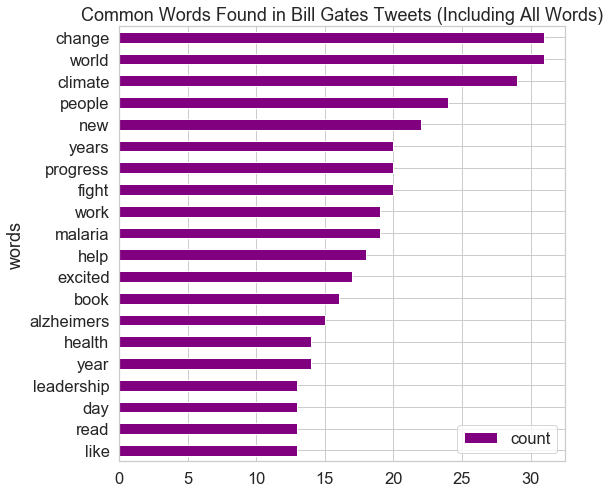

In [93]:
## Here are the most Common words used by the Bill_Gates
Bill_W_C1 = pd.DataFrame(Bill_Words_Counts.most_common(20), columns=['words', 'count'])
Bill_W_C1.head()
fig, ax = plt.subplots(figsize=(8, 8))
Bill_W_C1.sort_values(by='count').plot.barh(x='words', y='count', ax=ax, color="purple")
ax.set_title("Common Words Found in Bill Gates Tweets (Including All Words)")
plt.show()

In [94]:
Sunny_Total_Words = [tweet.lower().split() for tweet in Sunny['text1']]
List_Words_across_tweets1 = list(itertools.chain(*Sunny_Total_Words))
Sunny_Words_Counts = collections.Counter(List_Words_across_tweets1)
Sunny_Words_Counts.most_common()

[('google', 48),
 ('rt', 47),
 ('today', 39),
 ('amp', 39),
 ('new', 30),
 ('great', 28),
 ('help', 26),
 ('work', 25),
 ('see', 24),
 ('googleai', 21),
 ('digital', 20),
 ('ai', 19),
 ('people', 16),
 ('excited', 15),
 ('working', 15),
 ('thanks', 15),
 ('thank', 15),
 ('support', 15),
 ('proud', 15),
 ('us', 14),
 ('together', 13),
 ('everyone', 13),
 ('across', 13),
 ('years', 12),
 ('skills', 12),
 ('find', 12),
 ('congrats', 11),
 ('well', 11),
 ('forward', 11),
 ('googleorg', 11),
 ('search', 11),
 ('live', 11),
 ('first', 10),
 ('pixel', 10),
 ('youtube', 10),
 ('happy', 10),
 ('world', 10),
 ('android', 10),
 ('look', 9),
 ('make', 9),
 ('users', 9),
 ('research', 9),
 ('efforts', 9),
 ('partnership', 9),
 ('growwithgoogle', 9),
 ('announced', 8),
 ('data', 8),
 ('making', 8),
 ('community', 8),
 ('country', 8),
 ('businesses', 8),
 ('many', 7),
 ('privacy', 7),
 ('io19', 7),
 ('around', 7),
 ('also', 7),
 ('training', 7),
 ('team', 7),
 ('time', 7),
 ('better', 7),
 ('io', 7),

In [95]:
Sunny_W_C = pd.DataFrame(Sunny_Words_Counts.most_common(), columns=['words', 'count'])
Sunny_W_C.head()

,words,count
0,google,48
1,rt,47
2,today,39
3,amp,39
4,new,30


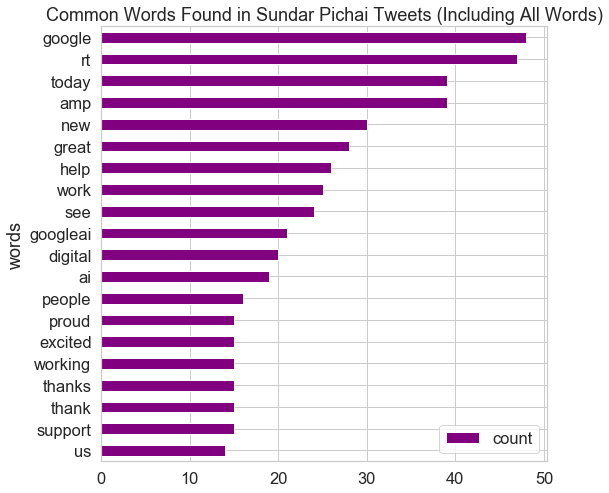

In [96]:
#here is the Most common words in Sundar Pichai Tweets
Sunny_W_C1 = pd.DataFrame(Sunny_Words_Counts.most_common(20), columns=['words', 'count'])
Sunny_W_C1.head()
fig, ax = plt.subplots(figsize=(8, 8))
Sunny_W_C1.sort_values(by='count').plot.barh(x='words', y='count', ax=ax, color="purple")
ax.set_title("Common Words Found in Sundar Pichai Tweets (Including All Words)")
plt.show()

### Now we calculate the log odds ratio for the words

In [97]:
# these are the common words for both BillGates and Sundar Pichai
Common_in_Billy_Sunny = []
for i in Bill_W_C1["words"]:
    for j in Sunny_W_C1["words"]:
        if i == j:
            Common_in_Billy_Sunny.append(i)
print(Common_in_Billy_Sunny)    

['people', 'new', 'work', 'help', 'excited']


In [98]:
sum(Bill_W_C['count'])

3192

### Log odds ratio of any word is nothing but number of time the word appeared in both users diveded by total words of each person respectively inside log will give us the answer

### The Formula is log odds ratio =  ln(((n+1)/(Total+1)) / ((n+1)/(Total+1)) )

### where n is the number of times the word in question is used by each person and the total indicates the total words for each person

### If the word is present in only one user than no need to calculate word count for the other

In [99]:
# log odds ratio for the common words
import math
my_list = Bill_W_C["words"].values
my_list1 = my_list.tolist()
my_list2 = Sunny_W_C["words"].values
my_list3 = my_list2.tolist()
Log_ratio_common = []
for i in Common_in_Billy_Sunny:
    pos1 = my_list1.index(i)
    pos2 = my_list3.index(i)
    m = math.log(((Bill_W_C['count'][pos1])/(sum(Bill_W_C['count'])))/((Sunny_W_C['count'][pos2])/(sum(Sunny_W_C['count']))))
    Log_ratio_common.append(m)


In [100]:
Log_ratio_common

[0.4148197132753847,
 -0.30080032313661936,
 -0.26508224053454,
 -0.35837017495809703,
 0.13451774812122627]

In [101]:
Dataframe = pd.DataFrame()
Dataframe["Words"] = Common_in_Billy_Sunny
Dataframe["log_score"] = Log_ratio_common

In [103]:
my_list = Bill_W_C["words"].values
my_list1 = my_list.tolist()
Log_ratio_word = []
Log_ratio = []
for i in my_list1:
    if i == 'people' or i == 'new' or i =='work' or i == 'help' or i == 'excited':
        continue 
    else:
        pos1 = my_list1.index(i)
        m = math.log(((Bill_W_C['count'][pos1])/(sum(Bill_W_C['count'])))/(1/(sum(Sunny_W_C['count'])+1)))
        Log_ratio.append(m)
        Log_ratio_word.append(i)
    

In [104]:
for i in range(0, len(Common_in_Billy_Sunny)):
    Log_ratio_word.append(Common_in_Billy_Sunny[i])
    Log_ratio.append(Log_ratio_common[i])

In [105]:
Bill_Words_Log = pd.DataFrame()

In [106]:
Bill_Words_Log["Words"] = Log_ratio_word
Bill_Words_Log["log_score"] = Log_ratio

In [107]:
Bill_Words_Log

,Words,log_score
0,change,3.443652
1,world,3.443652
2,climate,3.376961
3,years,3.005397
4,progress,3.005397
5,fight,3.005397
6,malaria,2.954104
7,book,2.782254
8,alzheimers,2.717715
9,health,2.648722


In [108]:
my_list = Sunny_W_C["words"].values
my_list1 = my_list.tolist()
Log_ratio_word1 = []
Log_ratio1 = []
for i in my_list1:
    if i == 'people' or i == 'new' or i =='work' or i == 'help' or i == 'excited':
        continue 
    else:
        pos1 = my_list1.index(i)
        m = math.log(((Sunny_W_C['count'][pos1])/(sum(Sunny_W_C['count'])))/(1/(sum(Bill_W_C['count'])+1)))
        Log_ratio1.append(m)
        Log_ratio_word1.append(i)

In [109]:
for i in range(0, len(Common_in_Billy_Sunny)):
    Log_ratio_word1.append(Common_in_Billy_Sunny[i])
    Log_ratio1.append(Log_ratio_common[i])

In [110]:
Sunny_Words_Log = pd.DataFrame()

In [111]:
Sunny_Words_Log["Words"] = Log_ratio_word1
Sunny_Words_Log["log_score"] = Log_ratio1

In [112]:
Sunny_Words_Log

,Words,log_score
0,google,3.862160
1,rt,3.841106
2,today,3.654520
3,amp,3.654520
4,great,3.323163
5,see,3.169012
6,googleai,3.035481
7,digital,2.986691
8,ai,2.935398
9,working,2.699009


In [113]:
Bill_Words_Log_Sorted = Bill_Words_Log.sort_values('log_score',ascending=False)

In [114]:
Bill_Words_Log_Sorted = Bill_Words_Log_Sorted.reset_index(drop = True)


In [115]:
Sunny_Words_Log_Sorted = Sunny_Words_Log.sort_values('log_score',ascending=False)

In [116]:
Sunny_Words_Log_Sorted = Sunny_Words_Log_Sorted.reset_index(drop = True)

In [117]:
print(Bill_Words_Log_Sorted.head(10))

        Words  log_score
0      change   3.443652
1       world   3.443652
2     climate   3.376961
3       years   3.005397
4    progress   3.005397
5       fight   3.005397
6     malaria   2.954104
7        book   2.782254
8  alzheimers   2.717715
9      health   2.648722


In [118]:
print(Sunny_Words_Log_Sorted.head(10))

      Words  log_score
0    google   3.862160
1        rt   3.841106
2     today   3.654520
3       amp   3.654520
4     great   3.323163
5       see   3.169012
6  googleai   3.035481
7   digital   2.986691
8        ai   2.935398
9   support   2.699009


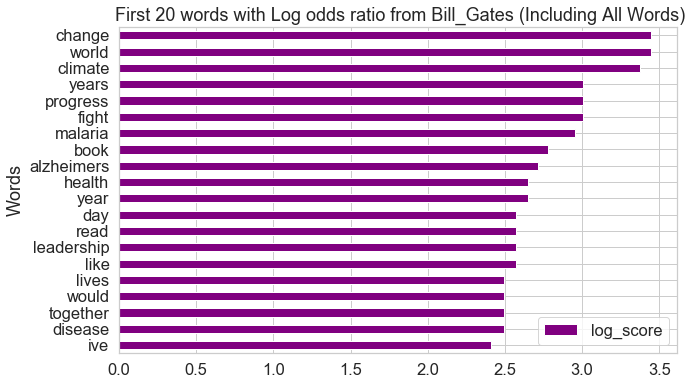

In [119]:
Bill_Words_Log_First = Bill_Words_Log_Sorted.head(20)
fig, ax = plt.subplots(figsize=(10, 6))
Bill_Words_Log_First.sort_values(by='log_score').plot.barh(x='Words', y='log_score', ax=ax, color="purple")
ax.set_title(" First 20 words with Log odds ratio from Bill_Gates (Including All Words)")
plt.show()

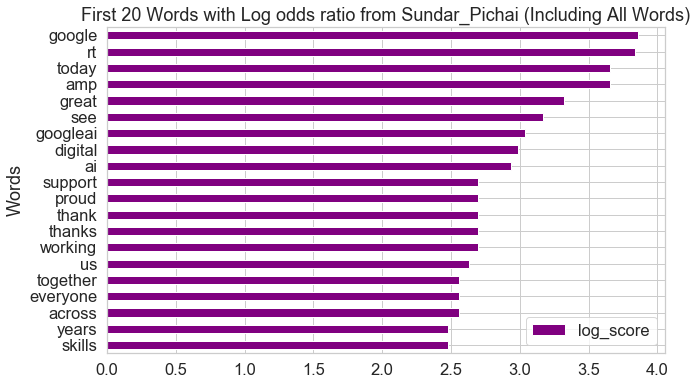

In [120]:
Sunny_Words_Log_First = Sunny_Words_Log_Sorted.head(20)
fig, ax = plt.subplots(figsize=(10, 6))
Sunny_Words_Log_First.sort_values(by='log_score').plot.barh(x='Words', y='log_score', ax=ax, color="purple")
ax.set_title("First 20 Words with Log odds ratio from Sundar_Pichai (Including All Words)")
plt.show()

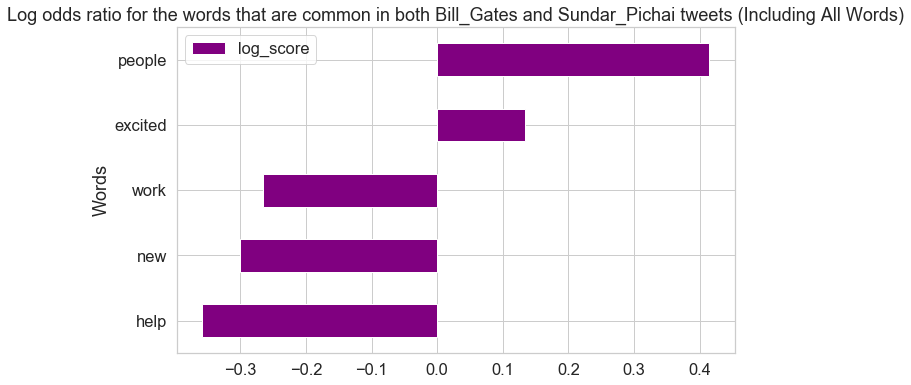

In [121]:
fig, ax = plt.subplots(figsize=(10, 6))
Dataframe.sort_values(by='log_score').plot.barh(x='Words', y='log_score', ax=ax, color="purple")
ax.set_title("Log odds ratio for the words that are common in both Bill_Gates and Sundar_Pichai tweets (Including All Words)")
plt.show()

### Only Five words are common in both the user tweets so the log odds ratio for those tweets are plotted above

### 5) Use the nltk vader module to calculate the sentiment of each tweet, and then for each of the two users, calculate the average 'combined' sentiment for all their tweets.

In [122]:
Suhash = SentimentIntensityAnalyzer()
def Vader_Sentiment_anlaysis(tweet):
    Polarity_Scores = Suhash.polarity_scores(tweet)
    print("{:-<40} {}".format(tweet, str(Polarity_Scores)))

In [123]:
tweet_text = []
compound_score = []
positive_score = []
neutral_score = []
negative_score = []

In [124]:
for i in range(0, len(Billy["text1"])):
    tweet_text.append(Billy['text1'][i])
    compound_score.append(Suhash.polarity_scores(Billy['text1'][i])['compound'])
    positive_score.append(Suhash.polarity_scores(Billy['text1'][i])['pos'])
    neutral_score.append(Suhash.polarity_scores(Billy['text1'][i])['neu'])
    negative_score.append(Suhash.polarity_scores(Billy['text1'][i])['neg'])

In [125]:
Billy_sentiment = pd.DataFrame()

In [126]:
Billy_sentiment["tweet_text"] = tweet_text
Billy_sentiment["compound_score"] = compound_score
Billy_sentiment["positive_score"] = positive_score
Billy_sentiment["neutral_score"] = neutral_score
Billy_sentiment["negative_score"] = negative_score

In [127]:
Billy_sentiment

,tweet_text,compound_score,positive_score,neutral_score,negative_score
0,worlds poorest people often rely farming feed ...,-0.5859,0.090,0.677,0.233
1,congrats esther duflo abhijit banerjee michael...,0.7351,0.301,0.590,0.109
2,world facing crisis dinner table climate chang...,-0.5106,0.227,0.444,0.329
3,odds dying aids south africa less half peak pr...,0.3554,0.198,0.701,0.101
4,need approaches stopping alzheimers disease ex...,0.5423,0.246,0.676,0.077
5,impressed international cooperation made years...,0.8591,0.396,0.604,0.000
6,cant think fitting tribute hans rosling lifes ...,0.9337,0.557,0.443,0.000
7,lyon france globalfunds replenishment celebrat...,0.7269,0.303,0.697,0.000
8,afghanistan last countries polio vaccine accep...,0.8885,0.443,0.557,0.000
9,countries world concentration researchers weal...,0.0690,0.218,0.575,0.207


In [128]:
Billy["compound_score"] = compound_score
Billy["positive_score"] = positive_score
Billy["neutral_score"] = neutral_score
Billy["negative_score"] = negative_score

In [129]:
Billy.head()

,post_time,text,retweet,Photo/Link_Normalized,Photo/Link,Photo,Link,No_Photo/Link_Normalized,hours,Hastag_Count,text1,compound_score,positive_score,neutral_score,negative_score
0,Sun Oct 20 23:10:00 +0000 2019,The world’s poorest people often rely on farmi...,796,1,2,1,1,0,23,0,worlds poorest people often rely farming feed ...,-0.5859,0.090,0.677,0.233
1,Sat Oct 19 17:05:00 +0000 2019,"Congrats to Esther Duflo, Abhijit Banerjee, an...",913,1,1,0,1,0,17,0,congrats esther duflo abhijit banerjee michael...,0.7351,0.301,0.590,0.109
2,Fri Oct 18 20:00:00 +0000 2019,The world is facing a crisis at the dinner tab...,714,1,1,0,1,0,20,0,world facing crisis dinner table climate chang...,-0.5106,0.227,0.444,0.329
3,Tue Oct 15 19:58:30 +0000 2019,The odds of dying of AIDS in South Africa are ...,585,1,2,1,1,0,19,0,odds dying aids south africa less half peak pr...,0.3554,0.198,0.701,0.101
4,Sat Oct 12 19:14:19 +0000 2019,We need more approaches to stopping #Alzheimer...,1172,1,1,0,1,0,19,1,need approaches stopping alzheimers disease ex...,0.5423,0.246,0.676,0.077


In [130]:
tweet_text1 = []
compound_score1 = []
positive_score1 = []
neutral_score1 = []
negative_score1 = []

In [131]:
for i in range(0, len(Sunny["text1"])):
    tweet_text1.append(Sunny['text1'][i])
    compound_score1.append(Suhash.polarity_scores(Sunny['text1'][i])['compound'])
    positive_score1.append(Suhash.polarity_scores(Sunny['text1'][i])['pos'])
    neutral_score1.append(Suhash.polarity_scores(Sunny['text1'][i])['neu'])
    negative_score1.append(Suhash.polarity_scores(Sunny['text1'][i])['neg'])

In [132]:
Sunny_sentiment = pd.DataFrame()
Sunny_sentiment["tweet_text"] = tweet_text1
Sunny_sentiment["compound_score"] = compound_score1
Sunny_sentiment["positive_score"] = positive_score1
Sunny_sentiment["neutral_score"] = neutral_score1
Sunny_sentiment["negative_score"] = negative_score1

In [133]:
Sunny_sentiment

,tweet_text,compound_score,positive_score,neutral_score,negative_score
0,inspiring see historic allwomanspacewalk hopef...,0.9118,0.583,0.417,0.000
1,excited introduce latest family madebygoogle h...,0.5574,0.155,0.845,0.000
2,today kicking 3rd impactchallengebayarea well ...,0.8779,0.389,0.611,0.000
3,building privacy amp security features discuss...,0.3400,0.094,0.906,0.000
4,thanks google 21st birthday wishes importantly...,0.9081,0.565,0.382,0.053
5,happy 5th birthday google classroom thank educ...,0.8402,0.346,0.654,0.000
6,detecting deepfakes important challenges ahead...,0.5859,0.216,0.784,0.000
7,great discussion new digital skills hub hosted...,0.8316,0.224,0.776,0.000
8,finland also announced new details largest cor...,0.2732,0.100,0.900,0.000
9,hei helsinki met finnish pm anttirinnepj today...,0.5859,0.161,0.839,0.000


In [134]:
Sunny["compound_score"] = compound_score1
Sunny["positive_score"] = positive_score1
Sunny["neutral_score"] = neutral_score1
Sunny["negative_score"] = negative_score1

In [135]:
Sunny.head()

,post_time,text,retweet,Photo/Link_Normalized,Photo/Link,Photo,Link,No_Photo/Link_Normalized,hours,Hastag_Count,text1,compound_score,positive_score,neutral_score,negative_score
0,Fri Oct 18 18:58:48 +0000 2019,Very inspiring to see the historic #AllWomanSp...,182,1,1,0,1,0,18,1,inspiring see historic allwomanspacewalk hopef...,0.9118,0.583,0.417,0.000
1,Tue Oct 15 15:29:13 +0000 2019,Very excited to introduce our latest family of...,773,1,1,0,1,0,15,1,excited introduce latest family madebygoogle h...,0.5574,0.155,0.845,0.000
2,Mon Oct 07 16:39:11 +0000 2019,Today we’re kicking off our 3rd #ImpactChallen...,151,1,1,0,1,0,16,1,today kicking 3rd impactchallengebayarea well ...,0.8779,0.389,0.611,0.000
3,Wed Oct 02 18:46:47 +0000 2019,Building on the privacy &amp; security feature...,258,1,1,0,1,0,18,1,building privacy amp security features discuss...,0.3400,0.094,0.906,0.000
4,Sat Sep 28 03:41:45 +0000 2019,Thanks for all the Google 21st birthday wishes...,1240,1,2,1,1,0,3,0,thanks google 21st birthday wishes importantly...,0.9081,0.565,0.382,0.053


In [136]:
print("The combined sentiment score for all the tweets of Bill_Gates is:",Billy['compound_score'].mean())
print("The combined Positive sentiment score for all the tweets of Bill_Gates is:",Billy['positive_score'].mean())
print("The combined neutral sentiment score for all the tweets of Bill_Gates is:",Billy['neutral_score'].mean())
print("The combined negative sentiment score for all the tweets of Bill_Gates is:",Billy['negative_score'].mean())

The combined sentiment score for all the tweets of Bill_Gates is: 0.4514850000000001
The combined Positive sentiment score for all the tweets of Bill_Gates is: 0.284435
The combined neutral sentiment score for all the tweets of Bill_Gates is: 0.6439499999999996
The combined negative sentiment score for all the tweets of Bill_Gates is: 0.07162500000000001


In [137]:
print("The combined sentiment score for all the tweets of Sundar_Pichai is:",Sunny['compound_score'].mean())
print("The combined Positive sentiment score for all the tweets of Bill_Gates is:",Sunny['positive_score'].mean())
print("The combined neutral sentiment score for all the tweets of Bill_Gates is:",Sunny['neutral_score'].mean())
print("The combined negative sentiment score for all the tweets of Bill_Gates is:",Sunny['negative_score'].mean())

The combined sentiment score for all the tweets of Sundar_Pichai is: 0.5388639999999998
The combined Positive sentiment score for all the tweets of Bill_Gates is: 0.2953800000000001
The combined neutral sentiment score for all the tweets of Bill_Gates is: 0.674445
The combined negative sentiment score for all the tweets of Bill_Gates is: 0.025185000000000003


In [137]:
#export_csv = Billy.to_csv (r"Cleaned_Bill_Gates.csv", index = False, header=True)

In [138]:
#export_csv = Sunny.to_csv (r"Cleaned_Sundar_Pichai.csv", index = False, header=True)

In [138]:
Combined = Billy.append(Sunny)

In [140]:
len(Combined)

400

In [141]:
export_csv = Combined.to_csv (r"Cleaned_SundarPichai_BillGates.csv", index = False, header=True)